In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_csv("E://DATA SETS/propData.csv")
print(df.shape)
print(df.dtypes)
df.head(9)

(9, 7)
PID             float64
ST_NUM          float64
ST_NAME          object
OWN_OCCUPIED     object
NUM_BEDROOMS     object
NUM_BATH         object
SQ_FT            object
dtype: object


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [3]:
#df['NUM_BATH'] = pd.to_numeric(df['NUM_BATH'], errors = 'coerce')
df['NUM_BATH'] = df['NUM_BATH'].replace('^[^0-9]+$', np.NaN, regex=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,NaN,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [4]:
# df['OWN_OCCUPIED'] = df['OWN_OCCUPIED'].str.replace('None', '') # replace('/d+','')
df['OWN_OCCUPIED'] = df['OWN_OCCUPIED'].replace('\d+', np.NaN, regex=True) # replace('/d+','')
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,NaN,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [5]:
df['NUM_BATH'] = df['NUM_BATH'].astype('float32') # astype()coverts data to specific type 
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1.0,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1.0,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2.0,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800
6,100007000.0,NaN,WASHINGTON,NaN,2,NaN,950
7,100008000.0,213.0,TREMONT,Y,1,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,na,2.0,1800


In [6]:
print(df.dtypes)

PID             float64
ST_NUM          float64
ST_NAME          object
OWN_OCCUPIED     object
NUM_BEDROOMS     object
NUM_BATH        float32
SQ_FT            object
dtype: object


In [9]:
mapR = {'Y': True, 'N': False}
df['OWN_OCCUPIED'] = df['OWN_OCCUPIED'].map(mapR)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,True,3,1.0,1000
1,100002000.0,197.0,LEXINGTON,False,3,1.5,--
2,100003000.0,NaN,LEXINGTON,False,NaN,1.0,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,NaN,203.0,BERKELEY,True,3,2.0,1600
5,100006000.0,207.0,BERKELEY,True,NaN,1.0,800
6,100007000.0,NaN,WASHINGTON,NaN,2,NaN,950
7,100008000.0,213.0,TREMONT,True,1,1.0,NaN
8,100009000.0,215.0,TREMONT,True,na,2.0,1800


In [10]:
df['OWN_OCCUPIED'] = df['OWN_OCCUPIED'].astype('boolean')
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,True,3,1.0,1000
1,100002000.0,197.0,LEXINGTON,False,3,1.5,--
2,100003000.0,NaN,LEXINGTON,False,NaN,1.0,850
3,100004000.0,201.0,BERKELEY,<NA>,1,NaN,700
4,NaN,203.0,BERKELEY,True,3,2.0,1600
5,100006000.0,207.0,BERKELEY,True,NaN,1.0,800
6,100007000.0,NaN,WASHINGTON,<NA>,2,NaN,950
7,100008000.0,213.0,TREMONT,True,1,1.0,NaN
8,100009000.0,215.0,TREMONT,True,na,2.0,1800


In [11]:
print(df.dtypes)

PID             float64
ST_NUM          float64
ST_NAME          object
OWN_OCCUPIED    boolean
NUM_BEDROOMS     object
NUM_BATH        float32
SQ_FT            object
dtype: object


### Standard Null(NaN or \<NA>) values
### NaN is of float type

In [10]:
print(df.isnull().values.any())

True


In [11]:
df.isnull()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,True,False,False,True,False,False
3,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,True,False
7,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False


In [13]:
print(df.isnull().sum().sum())

10


In [12]:
df2 = df.isnull().sum()
df2

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    2
NUM_BATH        2
SQ_FT           1
dtype: int64

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
x = df2.index
y = df2.values

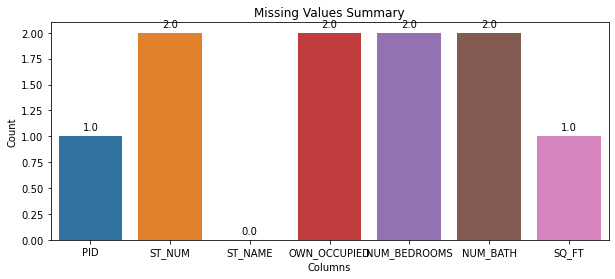

In [17]:
plt.figure(figsize = (10,4))
barplt = sns.barplot(x=x, y=y)
plt.title('Missing Values Summary')
plt.xlabel('Columns')
plt.ylabel('Count')

for p in barplt.patches:
    barplt.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0,9),
                   textcoords = 'offset points')


Text(0, 0.5, 'Count')

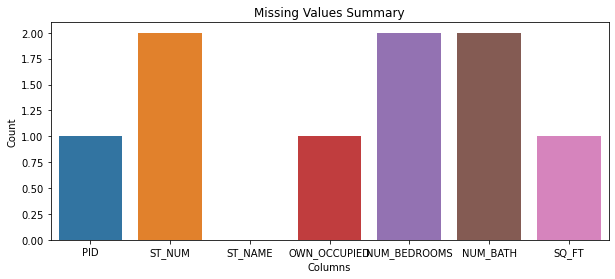

In [19]:
plt.figure(figsize = (10,4))
barplt = sns.barplot(x=x, y=y)
#for p in barplt.patches:
#    barplt.annotate(format(p.get_height(), '.1f'),
#                   (p.get_x() + p.get_width() / 2., p.get_height()),
#                   ha = 'center', va = 'center',
#                   xytext = (0,9),
#                   textcoords = 'offset points')
 
plt.title('Missing Values Summary')
plt.xlabel('Columns')
plt.ylabel('Count')

In [19]:
print(df["ST_NUM"].nunique())

7


In [20]:
print(df["ST_NUM"].sort_values().unique())

[104. 197. 201. 203. 207. 213. 215.  nan]


In [20]:
print(df['ST_NUM'])
print(df['ST_NUM'].isnull())

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64
0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool


### NON STANDARD MISSING VALUES

In [21]:
print(df['NUM_BEDROOMS'].nunique())

4


In [22]:
print(df['NUM_BEDROOMS'].sort_values().unique()) # should be run in start after completing data frame

['1' '2' '3' 'na' nan]


In [23]:
print(df['NUM_BEDROOMS'])

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7      1
8     na
Name: NUM_BEDROOMS, dtype: object


In [24]:
df['NUM_BEDROOMS'] = df['NUM_BEDROOMS'].replace('^[^0-9]+$', np.NaN, regex=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,True,3,1.0,1000
1,100002000.0,197.0,LEXINGTON,False,3,1.5,--
2,100003000.0,NaN,LEXINGTON,False,NaN,1.0,850
3,100004000.0,201.0,BERKELEY,<NA>,1,NaN,700
4,NaN,203.0,BERKELEY,True,3,2.0,1600
5,100006000.0,207.0,BERKELEY,True,NaN,1.0,800
6,100007000.0,NaN,WASHINGTON,<NA>,2,NaN,950
7,100008000.0,213.0,TREMONT,True,1,1.0,NaN
8,100009000.0,215.0,TREMONT,True,NaN,2.0,1800


In [25]:
print(df['SQ_FT'].sort_values().unique())

['--' '1000' '1600' '1800' '700' '800' '850' '950' nan]


In [26]:
print(df['SQ_FT'])

0    1000
1      --
2     850
3     700
4    1600
5     800
6     950
7     NaN
8    1800
Name: SQ_FT, dtype: object


In [38]:
df['SQ_FT'] = df['SQ_FT'].replace('^[^0-9]+$', np.NaN, regex=True)
df

,Unnamed: 0,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,0,100001000.0,104.0,PUTNAM,True,3.0,1.0,1000.0
1,1,100002000.0,197.0,LEXINGTON,False,3.0,1.5,NaN
2,2,100003000.0,NaN,LEXINGTON,False,NaN,1.0,850.0
3,3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,4,NaN,203.0,BERKELEY,True,3.0,2.0,1600.0
5,5,100006000.0,207.0,BERKELEY,True,NaN,1.0,800.0
6,6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,7,100008000.0,213.0,TREMONT,True,1.0,1.0,NaN
8,8,100009000.0,215.0,TREMONT,True,NaN,2.0,1800.0


In [41]:
df.to_csv("E://DATA SETS//propData_c.csv", index=False)

In [42]:
df = pd.read_csv("E://DATA SETS//propData_c.csv")
df

,Unnamed: 0,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,0,100001000.0,104.0,PUTNAM,True,3.0,1.0,1000.0
1,1,100002000.0,197.0,LEXINGTON,False,3.0,1.5,NaN
2,2,100003000.0,NaN,LEXINGTON,False,NaN,1.0,850.0
3,3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,4,NaN,203.0,BERKELEY,True,3.0,2.0,1600.0
5,5,100006000.0,207.0,BERKELEY,True,NaN,1.0,800.0
6,6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,7,100008000.0,213.0,TREMONT,True,1.0,1.0,NaN
8,8,100009000.0,215.0,TREMONT,True,NaN,2.0,1800.0


## Alternative Techniques

missing_values = ["n/a", "na", "--"]
df = pd.read_csv("E://DATA SETS//propData.csv", na_values = missing_values)

In [25]:
print(df['NUM_BEDROOMS'])
print(df['NUM_BEDROOMS'].isnull())

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    1.0
8    NaN
Name: NUM_BEDROOMS, dtype: float64
0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8     True
Name: NUM_BEDROOMS, dtype: bool


In [26]:
print(df['OWN_OCCUPIED'])
print(df['OWN_OCCUPIED'].isnull())

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object
0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool


In [27]:
cnt = 0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

In [28]:
print(df['OWN_OCCUPIED'])
print(df['OWN_OCCUPIED'].isnull())

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object
0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool
